# Count Circles

## Description

Count the number of circles in the following image


## Group ID

Identify your group here, including the number and name of each group's member

In [48]:
import cv2
# to install cv2 use: pip install opencv-python
import math
import matplotlib.pyplot as plt 
import numpy as np

(648, 702)


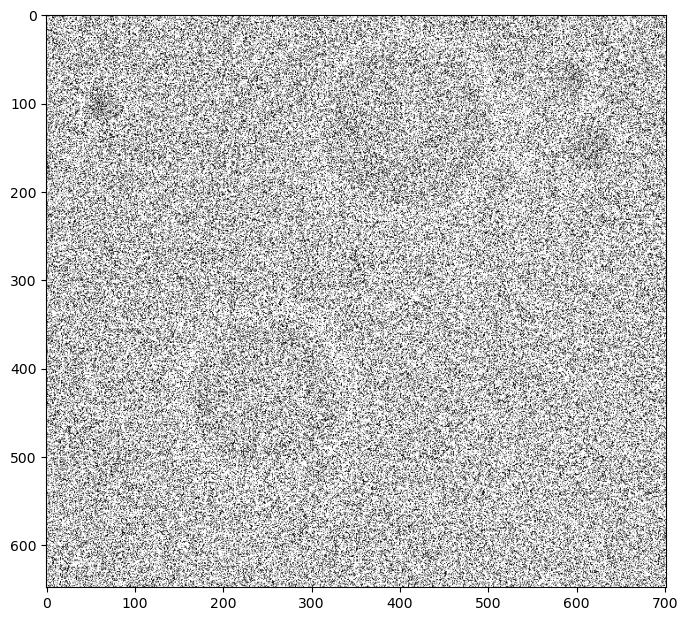

In [49]:
fname = 'Circles-noisy.png'
ini_img = cv2.imread(fname,cv2.IMREAD_GRAYSCALE)
W,H=ini_img.shape
print(ini_img.shape)
ratio=H/W
fig = plt.figure(figsize=(8,8*ratio))
plt.imshow(ini_img, cmap='gray')

# Suavisar Imagem

In [50]:
# OpenCV Median 
#m = 11
#dImg = cv2.GaussianBlur(ini_img,(m,m),0)
#dImg = cv2.medianBlur(dImg,m,0)
m = 21
#dImg = cv2.bilateralFilter(ini_img, m, 250,0)
dImg = cv2.medianBlur(ini_img,11,0)

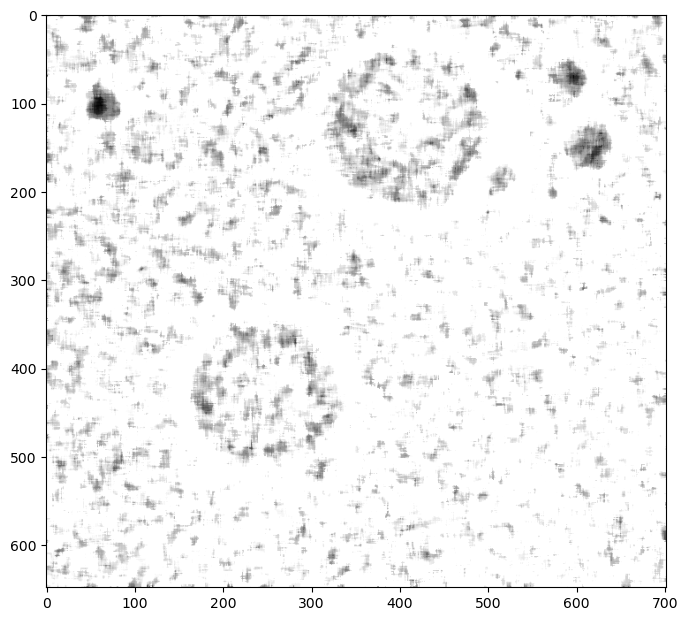

In [51]:
fig = plt.figure(figsize=(8,8*ratio))
plt.imshow(dImg, cmap='gray')

In [52]:
# OpenCV Gaussian Blur 
m= 31
#dImg2 = cv2.medianBlur(dImg,m,0)
dImg2 = dImg

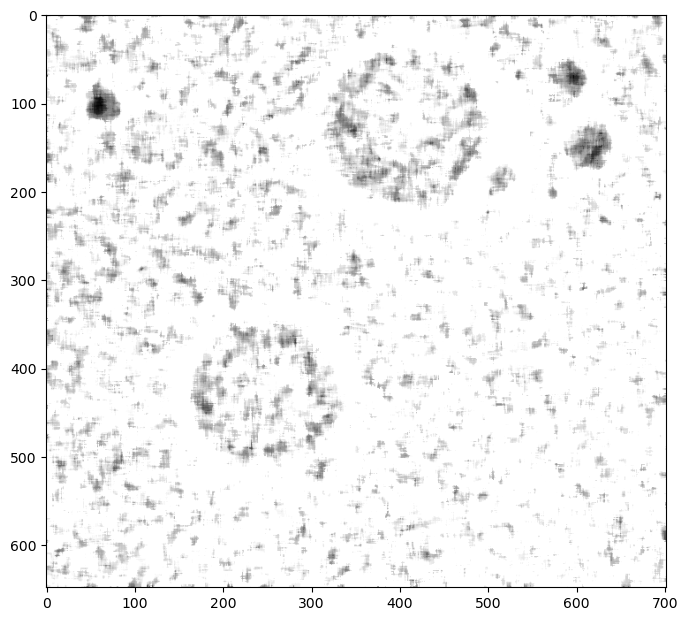

In [53]:
fig = plt.figure(figsize=(8,8*ratio))
plt.imshow(dImg2, cmap='gray')

In [54]:
# OpenCV Local Denoising Filter 
dImg3 = cv2.fastNlMeansDenoising(dImg2,None,25,17,61)
dImg3 = cv2.fastNlMeansDenoising(dImg3,None,5,7,50)
#dImg3 = dImg2

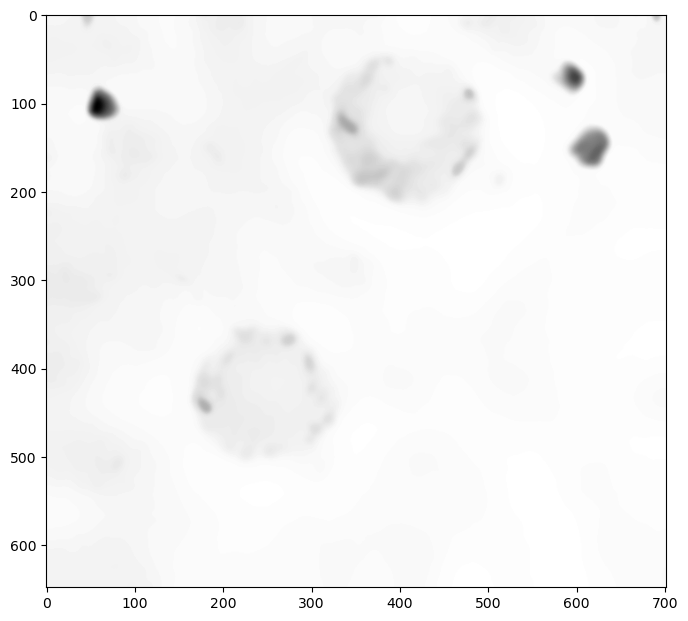

In [55]:
fig = plt.figure(figsize=(8,8*ratio))
plt.imshow(dImg3, cmap='gray')

In [66]:
m = 7
i = 200
dImg4 = dImg3
for _ in range(i):
    dImg4 = cv2.medianBlur(dImg4, m,0)


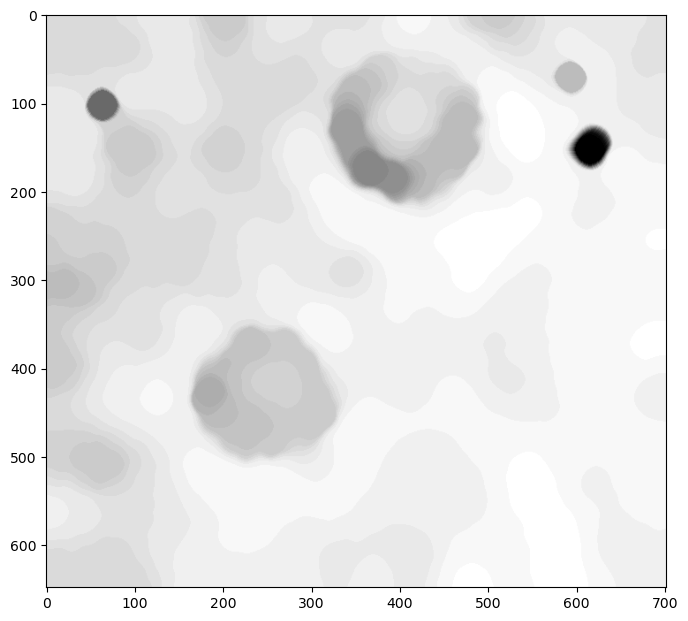

In [67]:
fig = plt.figure(figsize=(8,8*ratio))
plt.imshow(dImg4, cmap='gray')

In [68]:
img = dImg4
ddepth = cv2.CV_16S
scale = 1
delta = 0
m = 3
#grad_x = cv2.Scharr(img,ddepth,1,0)
grad_x = cv2.Sobel(img, ddepth, 1, 0, ksize=m, scale=scale, delta=delta, borderType=cv2.BORDER_DEFAULT)

#grad_y = cv2.Scharr(img,ddepth,0,1)
grad_y = cv2.Sobel(img, ddepth, 0, 1, ksize=m, scale=scale, delta=delta, borderType=cv2.BORDER_DEFAULT)


abs_grad_x = cv2.convertScaleAbs(grad_x)
abs_grad_y = cv2.convertScaleAbs(grad_y)


grad_img = cv2.addWeighted(abs_grad_x, 0.5, abs_grad_y, 0.5, 0)
dImg5 = grad_img

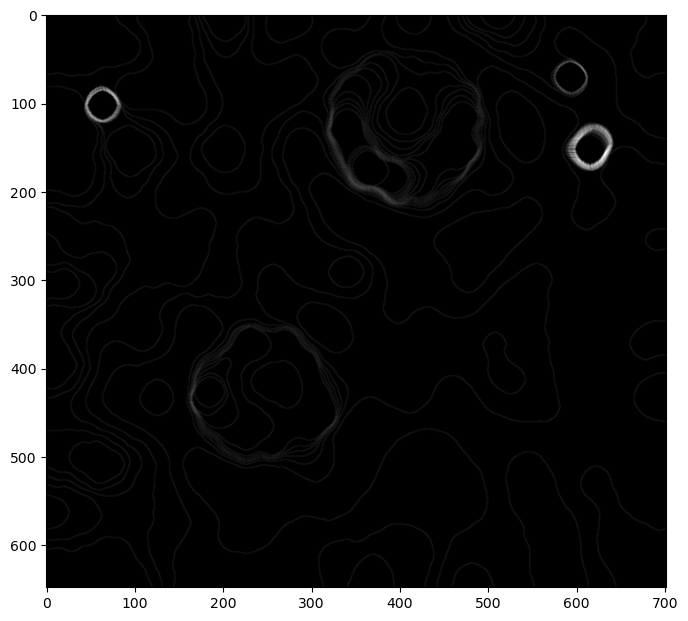

In [69]:
fig = plt.figure(figsize=(8,8*ratio))
plt.imshow(grad_img, cmap='gray')

# Thresholding

In [70]:
# convert the image representation to SPFP
img_float32 = np.float32(dImg5)

In [71]:
def matrix_average(matrix):
    if len(matrix) == 0 or len(matrix[0]) == 0:
        return 0  # To handle the case of an empty matrix and avoid division by zero

    # Convert the matrix to a NumPy array
    np_matrix = np.array(matrix)

    # Use the np.mean() function to calculate the average
    average = np.mean(np_matrix)

    return average

In [72]:
def matrix_median(matrix):
    if len(matrix) == 0 or len(matrix[0]) == 0:
        return 0  # Para lidar com o caso de uma matriz vazia e evitar a divisão por zero

    # Converter a matriz para um array NumPy
    np_matrix = np.array(matrix)

    # Usar a função np.median() para calcular a mediana
    median_value = np.median(np_matrix)

    return median_value

In [73]:
#Calculo da média e da mediana para usar no threshold minimo de Gthres
print(matrix_average(img_float32))
#print(matrix_median(img_float32))

0.3318407


(Text(0.5, 1.0, 'Adaptive Thresholding'), ([], []), ([], []))

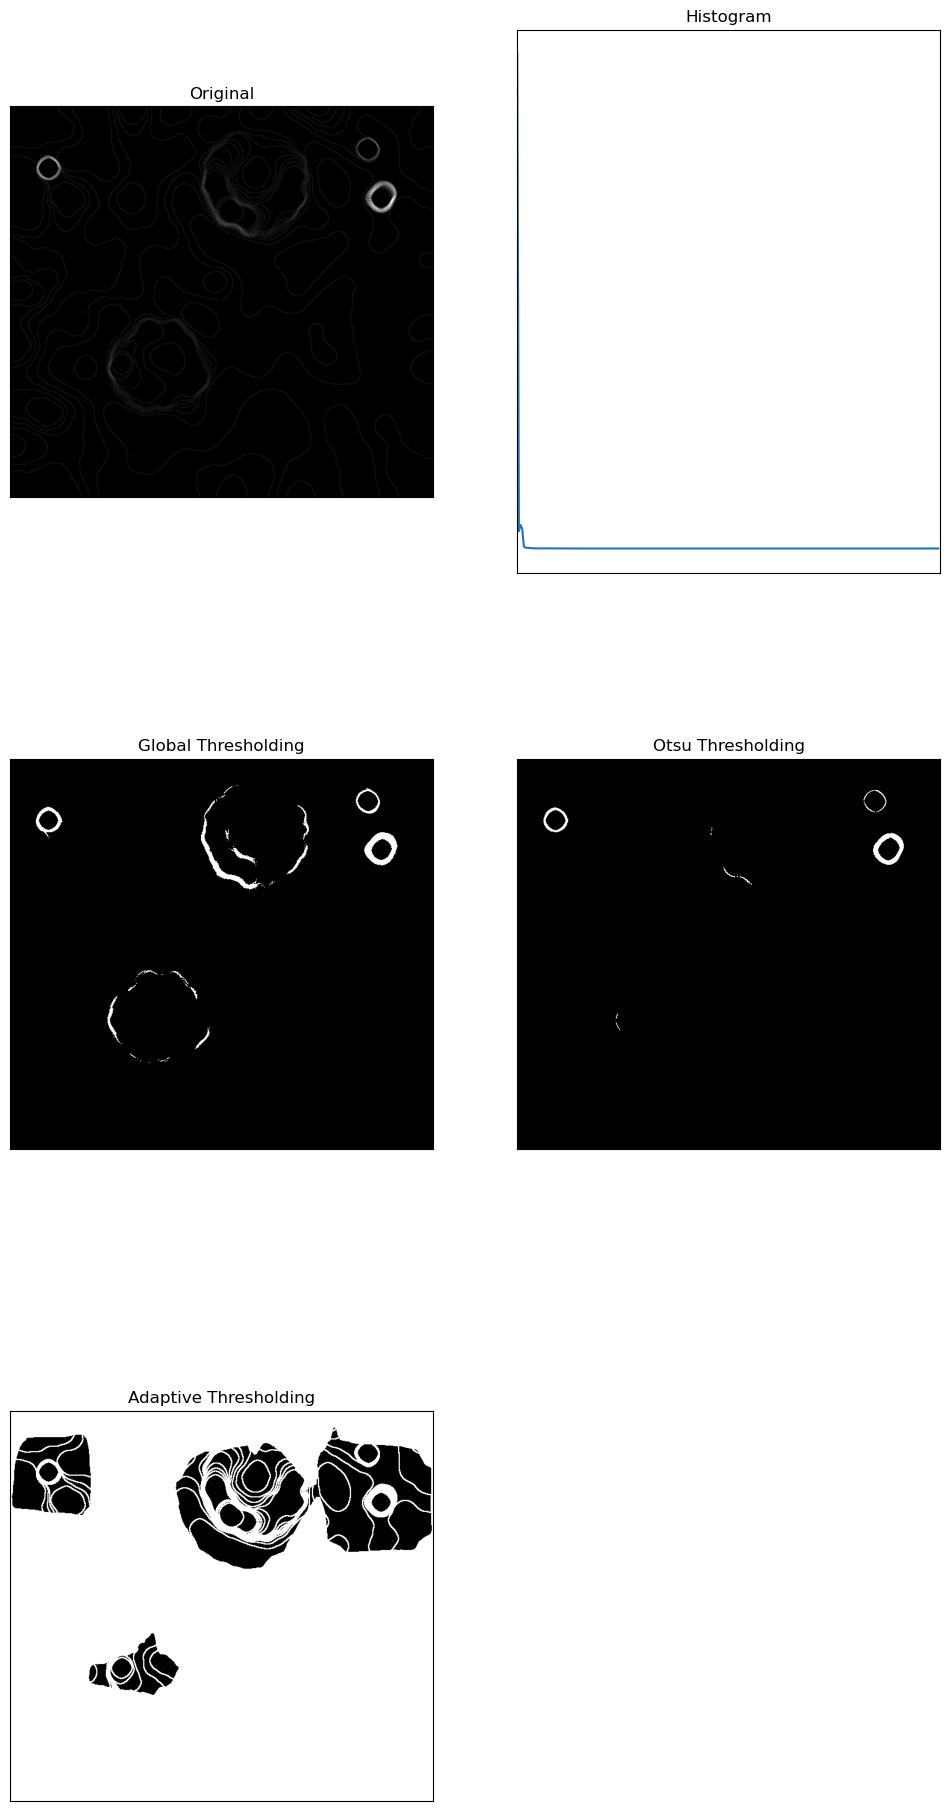

In [74]:
img = dImg5

# histogram
hist = cv2.calcHist([img],[0],None,[256],[0,256])

# Global
ret, Gthres = cv2.threshold(img,3,255,cv2.THRESH_BINARY)

# Otsu thresholding
ret, Othres = cv2.threshold(img,0,255,cv2.THRESH_BINARY+cv2.THRESH_OTSU)

# Adaptive Thresholdinh
Athres = cv2.adaptiveThreshold(img,255,cv2.ADAPTIVE_THRESH_MEAN_C,\
            cv2.THRESH_BINARY,151,1)

fig = plt.figure(figsize=(12,24))
plt.subplot(3,2,1),plt.imshow(img,cmap = 'gray')
plt.title('Original'), plt.xticks([]), plt.yticks([])
plt.subplot(3,2,2),plt.plot(hist),plt.xlim([0,256])
plt.title('Histogram'), plt.xticks([]), plt.yticks([])
plt.subplot(3,2,3),plt.imshow(Gthres,cmap = 'gray')
plt.title('Global Thresholding'), plt.xticks([]), plt.yticks([])
plt.subplot(3,2,4),plt.imshow(Othres,cmap = 'gray')
plt.title('Otsu Thresholding'), plt.xticks([]), plt.yticks([])
plt.subplot(3,2,5),plt.imshow(Athres,cmap = 'gray')
plt.title('Adaptive Thresholding'), plt.xticks([]), plt.yticks([])

# Circle Detection

(Text(0.5, 1.0, 'Hough: detected circles'), ([], []), ([], []))

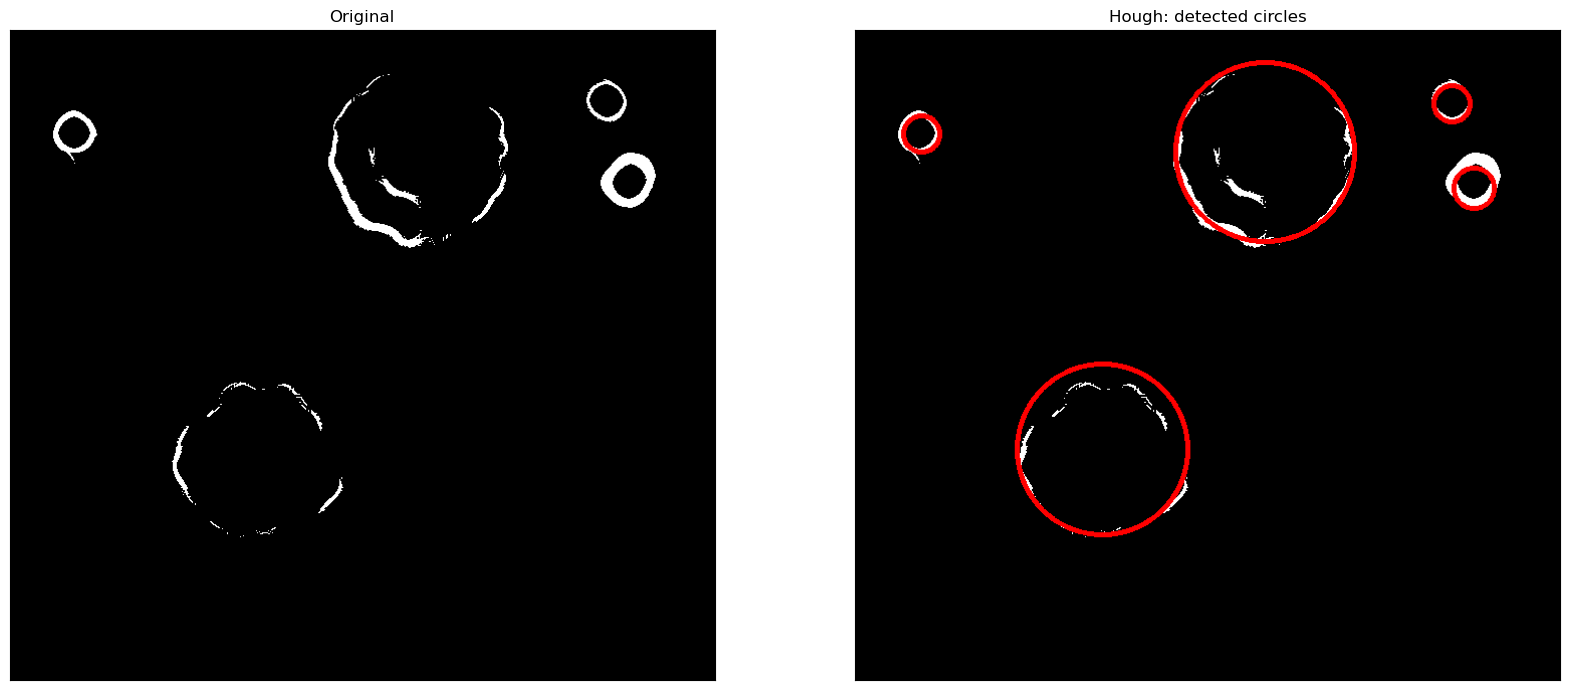

In [75]:
# param1: This is the higher threshold of the two passed to the Canny edge detector. 
#It essentially controls how strong the edges in the image should be to be considered for circle detection. 
#Increasing this value can make the edge detection more strict.

# param2: This is the accumulator threshold for the circle centers at the detection stage. 
#It controls how many votes a region in the accumulator needs to be considered a circle center. 
#Lowering this value can make the detection more tolerant and may result in detecting more circles.     Escrito pelo primo :V

img = Gthres
# HoughCircles(image, method, resolution, min distance between centers, 
#              param1 : Canny upper threshold
#              param2 : how many pixels for a circle)
circles = cv2.HoughCircles(img, cv2.HOUGH_GRADIENT, 1, 85,
                               param1=25, param2=13.9, #original param1 and param2: 75 , 25 (baixar ajuda o algoritmo a ser mais forgiving
                               minRadius=1, maxRadius=110)

# Draw the lines
img_dst = cv2.cvtColor(img, cv2.COLOR_GRAY2BGR)
if circles is not None:
    circles = np.uint16(np.around(circles))
    for i in circles[0, :]:
        center = (i[0], i[1])
        # circle center
        #cv.circle(img_dst, center, 1, (0, 100, 100), 3)
        # circle outline
        radius = i[2]
        cv2.circle(img_dst, center, radius, (255, 0, 0), 3)
        
fig = plt.figure(figsize=(20,10))
plt.subplot(1,2,1),plt.imshow(img,cmap = 'gray')
plt.title('Original'), plt.xticks([]), plt.yticks([])
plt.subplot(1,2,2),plt.imshow(img_dst,cmap = 'gray')
plt.title('Hough: detected circles'), plt.xticks([]), plt.yticks([])
